In [20]:
from scipy.io import loadmat
from pathlib import Path
import numpy as np
import mne
%matplotlib inline  

In [2]:
Path.ls = lambda x: list(x.iterdir())

In [3]:
files = Path("Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow").ls()
files

[PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P08T.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P07E.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P04T.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P01T.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P02E.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P03T.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P05T.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P01E.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P04E.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCCI-2020-Glasgow/parsed_P07T.mat'),
 PosixPath('Clinical-Brain-Computer-Interfaces-Challenge-WCC

In [4]:
annots = loadmat(files[0])

In [5]:
annots

{'Labels': array([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
  

In [6]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Labels', 'RawEEGData', 'cueAt', 'sampRate'])

In [7]:
annots['RawEEGData'].shape

(80, 12, 4096)

In [8]:
annots['Labels'].shape

(80, 1)

In [12]:
annots['sampRate']

array([[512]], dtype=uint16)

In [14]:
annots['RawEEGData'][0].shape

(12, 4096)

In [53]:
# Numpy array of size 4 X 10000.
data = annots['RawEEGData'][0]
sfreq= 512
# Definition of channel types and names.
ch_types = ['eeg'] * 12
ch_names = ['F3',  'FC3',  'C3',  'CP3',  'P3',  'FCz', 'CPz', 'F4', 'FC4',  'C4', 'CP4', 'P4']
montage = mne.channels.make_standard_montage('standard_1020')

In [54]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

In [55]:
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=12, n_times=4096
    Range : 0 ... 4095 =      0.000 ...     7.998 secs
Ready.


In [56]:
raw.set_montage(montage)

<RawArray | 12 x 4096 (8.0 s), ~423 kB, data loaded>

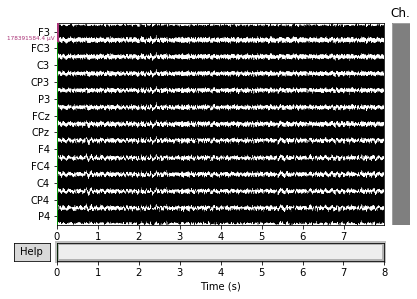

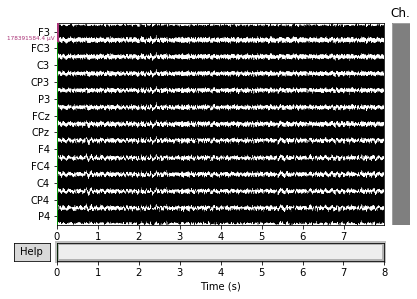

In [48]:
# It is also possible to auto-compute scalings
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=12, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

In [51]:
ica = mne.preprocessing.ICA(n_components=4, random_state=97, max_iter=800)
ica.fit(raw)

Fitting ICA to data using 12 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 4 components
Fitting ICA took 0.0s.


<ICA  |  raw data decomposition, fit (fastica): 4096 samples, 4 components, channels used: "eeg">

    Using multitaper spectrum estimation with 7 DPSS windows
4 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
4 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
4 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
4 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


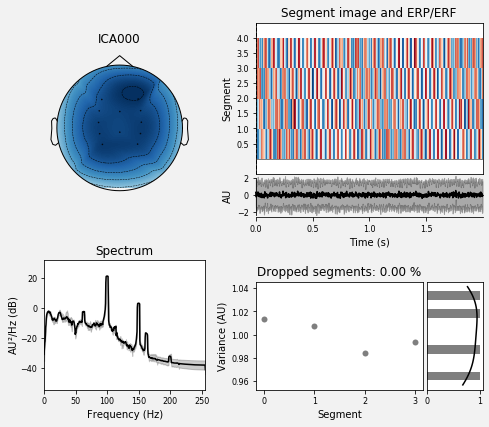

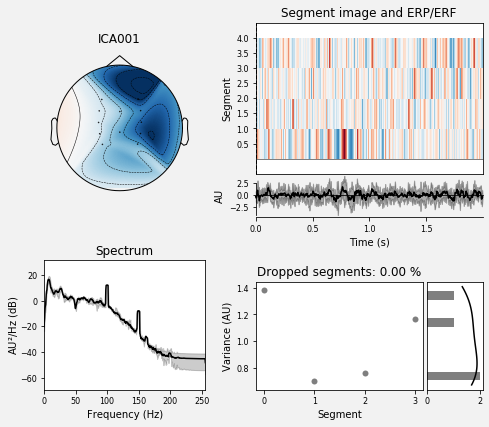

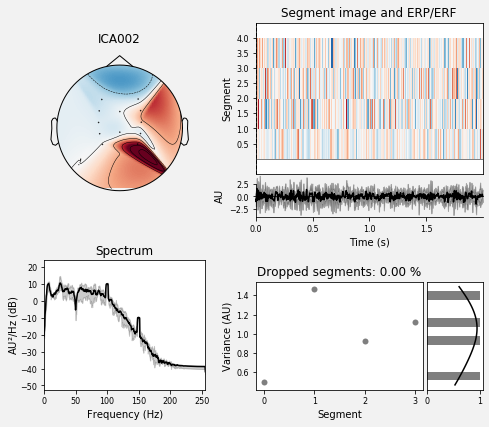

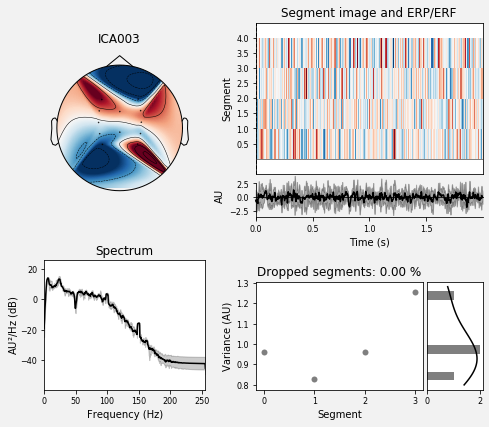

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [52]:
ica.plot_properties(raw)

In [57]:
events = mne.make_fixed_length_events(raw)

In [58]:
events

array([[   0,    0,    1],
       [ 512,    0,    1],
       [1024,    0,    1],
       [1536,    0,    1],
       [2048,    0,    1],
       [2560,    0,    1],
       [3072,    0,    1],
       [3584,    0,    1]])

In [61]:
mne.find_events(raw)

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.